In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.io.wavfile
import IPython

def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

# "Ver" o som!

In [3]:
# NOTA: Só funciona com 1 canal (mono).  Para gravar uma amostra audio monoaural,
# pode usar o comando (linux): rec -r 44100 -c 1 -b 16 test.wav
(taxa_amostragem, sinal_entrada) = scipy.io.wavfile.read("A440.wav")
array_tempos = np.arange(0, len(sinal_entrada)/taxa_amostragem, 1/taxa_amostragem)

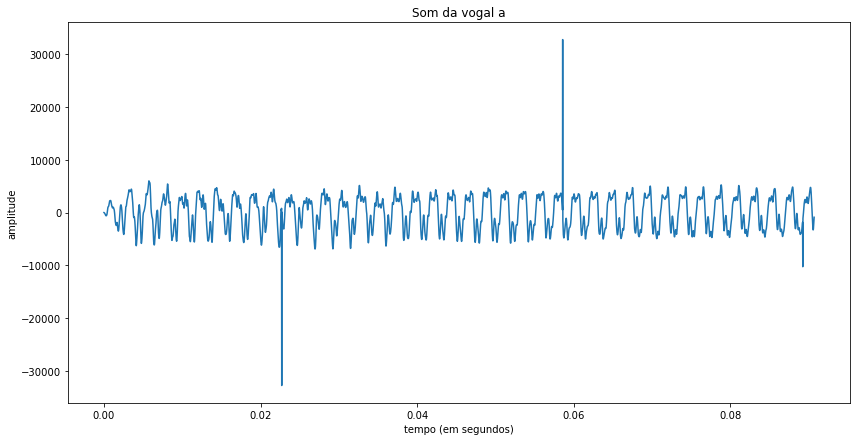

In [4]:
setup_graph(title='Som da vogal a', x_label='tempo (em segundos)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(array_tempos[0:4000], sinal_entrada[0:4000])

In [5]:
#IPython.display.Audio("audio_files/vowel_ah.wav")

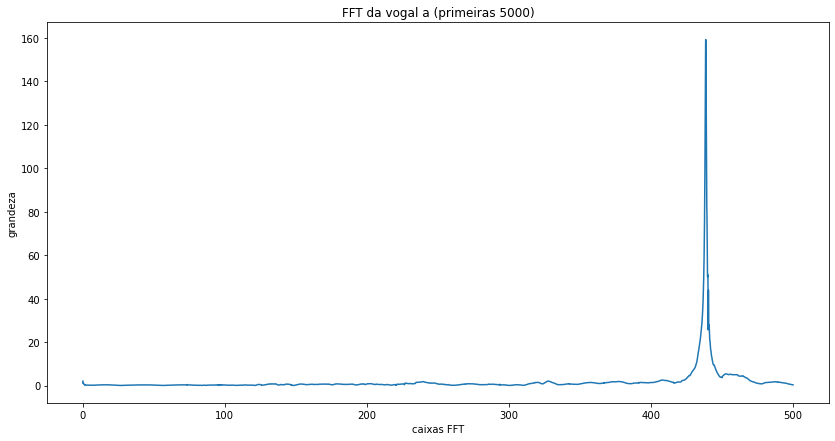

In [6]:
fft_out = np.fft.rfft(sinal_entrada)
fft_grand = [np.sqrt(i.real**2 + i.imag**2)/len(fft_out) for i in fft_out]
num_amostras = len(sinal_entrada)
rfreqs = [(i*1.0/num_amostras)*taxa_amostragem for i in range(num_amostras//2+1)]

setup_graph(title='FFT da vogal a (primeiras 5000)', x_label='caixas FFT', y_label='grandeza', fig_size=(14,7))
_ = plt.plot(rfreqs[0:5000], fft_grand[0:5000])

## Algumas notas sobre  isto

* A razão dos harmónicos = **timbre** = É isto que faz a voz de diferentes pessoas soar diferente (e o mesmo para diferentes instrumentos musicais)!
    - Mesmo que cantem a mesma nota e ao mesmo volume
* Aplicaçao possível: sintetizar novos sons (usando diferentes perfis harmónicos) 
    - Exemplo: Se mudar a razão dos harmónicos, será possível soar a alguém diferente ?

# Espectrograma (FFT ao longo do tempo)

### Eixos

* x-axis: tempo
* y-axis: frequência
* z-axis (color): grandeza de cada frequência

### Veja os  harmónicos!

In [8]:
(taxa_amostragem_doremi, doremi) = scipy.io.wavfile.read("do-re-mi.wav")

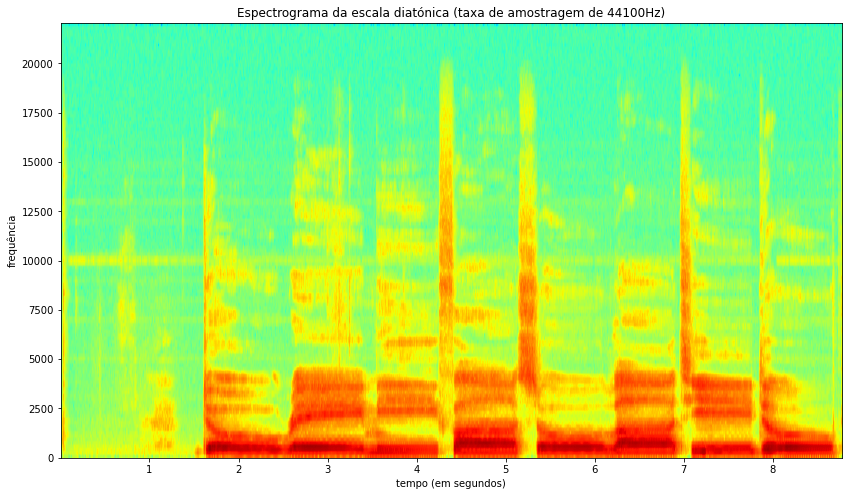

In [9]:
setup_graph(title='Espectrograma da escala diatónica (taxa de amostragem de 44100Hz)', x_label='tempo (em segundos)', y_label='frequência', fig_size=(14,8))
_ = plt.specgram(doremi, Fs=taxa_amostragem_doremi,cmap='jet')

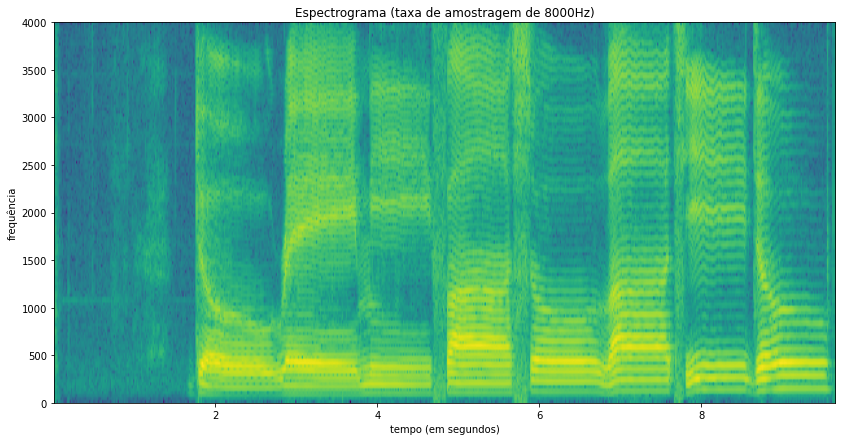

In [10]:
doremi_8000hz = [doremi[i] for i in range(0, len(doremi), 44100//8000)]
setup_graph(title='Espectrograma (taxa de amostragem de 8000Hz)', x_label='tempo (em segundos)', y_label='frequência', fig_size=(14,7))
_ = plt.specgram(doremi_8000hz, Fs=8000)

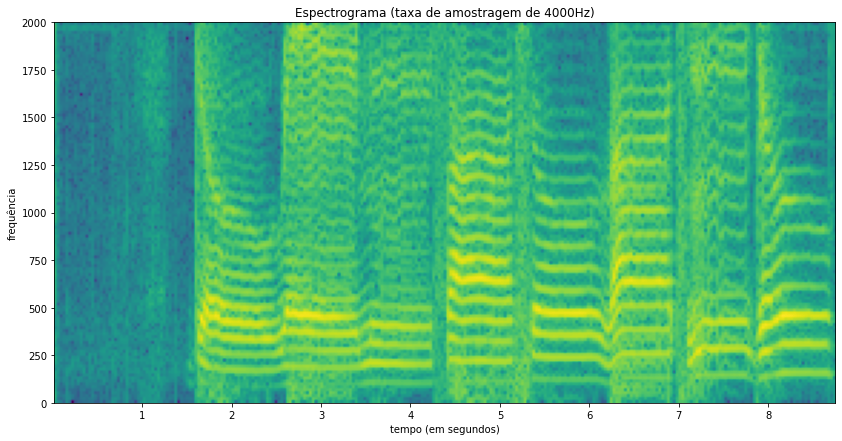

In [12]:
doremi_4000hz = [doremi[i] for i in range(0, len(doremi), 44100//4000)]
setup_graph(title='Espectrograma (taxa de amostragem de 4000Hz)', x_label='tempo (em segundos)', y_label='frequência', fig_size=(14,7))
_ = plt.specgram(doremi_4000hz, Fs=4000)

## Alguns reparos

* Algo que soa como uma única nota é na realidade composta por um conjunto de harmónicos.
* Harmónicos são múltiplos inteiros das *frequências fundamentais *
* Repare que o espaçamento entre os harmónicos da primeira nota é cerca do dobro do espaçamento entre os harmónicos da última nota (1 oitava de diferença).

In [13]:
# Limpar para reduzir o tamanho do notebook
del sinal_entrada, array_tempos, rfreqs, doremi, fft_out, fft_grand, doremi_4000hz, doremi_8000hz, _